# Ensemble - Random Forest (Bagging)
1. Bagging - Creating 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the train dataset


In [2]:
import pandas as pd

df = pd.read_csv('train_titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2 : Basic data quality checks


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m = df.isna().sum()
m

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3: Seperate X and Y (Survived)


1. Drop Passanger Id , Name and ticket number these are statistically insignificant
2. Drop cabin column  because it has too many missing values

In [7]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin','Survived'])
Y = df[['Survived']]

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [10]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

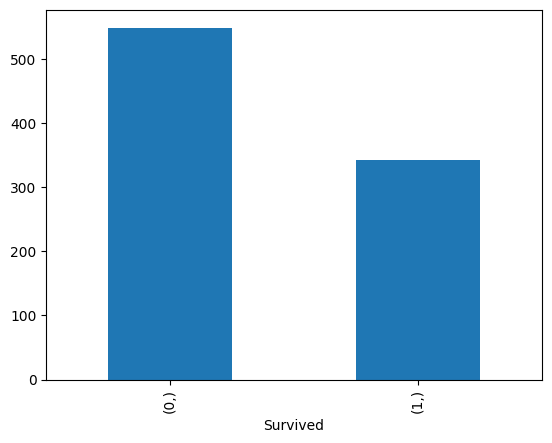

In [11]:
Y.value_counts().plot(kind='bar')

### Step4 : Perform preprocessing on X

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Sex', 'Embarked']

In [14]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [17]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), 
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [18]:
pre = ColumnTransformer([('num', num_pipe, con), ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [19]:
import sklearn
sklearn.__version__

'1.5.0'

In [20]:
X_pre = pre.fit_transform(X)

In [21]:
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


### Step 5: Apply train test split

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [25]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [26]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [27]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [28]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [30]:
xtrain.shape


(712, 10)

In [32]:
xtest.shape

(179, 10)

### Step 6 : Build the Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=1, min_samples_split=5, min_samples_leaf=5)

model1.fit(xtrain,ytrain)
 

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [37]:
model1.score(xtrain,ytrain)

0.7879213483146067

In [38]:
model1.score(xtest,ytest)

0.7821229050279329

### Step 7 : Tune the model with hyperparameter tuning 

In [42]:
params1 = {'n_estimators': [10,50,100,200],
           'max_depth':[1,2,3,4,5,6,7],
           'min_samples_split':[5,6,7,8,9,10]}

In [43]:
# for faster response use randomizedserachcv 

from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params1, cv=5, scoring='f1_macro')
rscv1.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [44]:
rscv1.best_params_

{'n_estimators': 100, 'min_samples_split': 7, 'max_depth': 6}

In [45]:
rscv1.best_score_

np.float64(0.8073807543159528)

In [46]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=6, min_samples_split=7)

### Step 8 : Evaluate Random Forest

In [47]:
best_rfc.score(xtrain, ytrain)

0.8637640449438202

In [48]:
best_rfc.score(xtest, ytest)

0.8044692737430168

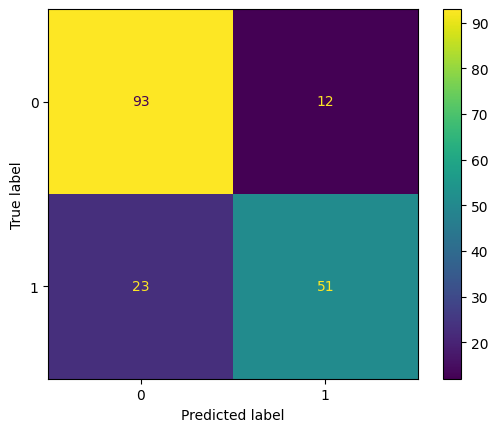

In [49]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

In [50]:
# Predict the for train and test
ypred_train = best_rfc.predict(xtrain)
ypred_test = best_rfc.predict(xtest)

In [51]:
ypred_train[0:5]

array([0, 0, 0, 0, 0])

In [52]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [53]:
ypred_test[0:5]

array([0, 0, 0, 1, 1])

In [54]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [55]:
# Print the classification result
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=1, max_depth=1, min_samples_split=5, min_samples_leaf=5)
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [57]:
model2.score(xtrain,ytrain)

0.7879213483146067

In [58]:
model2.score(xtest, ytest)

0.7821229050279329

### Hyperparameter Tuning 

In [59]:
params2 = {'n_estimators': [10,50,100,200,300],
           'learning_rate': [0.01,0.05,0.1,0.2],
           'max_depth':[2,3,4,5,6,7]}

In [60]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=params2, cv=5, scoring='f1_macro')
rscv2.fit (xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [61]:
rscv2.best_params_

{'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.1}

In [62]:
rscv2.best_score_


np.float64(0.7972771380642018)

In [63]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=6, n_estimators=50)

In [64]:
best_gbc.score(xtrain,ytrain)

0.9480337078651685

In [65]:
best_gbc.score(xtest,ytest)

0.8156424581005587

### Evaluate model

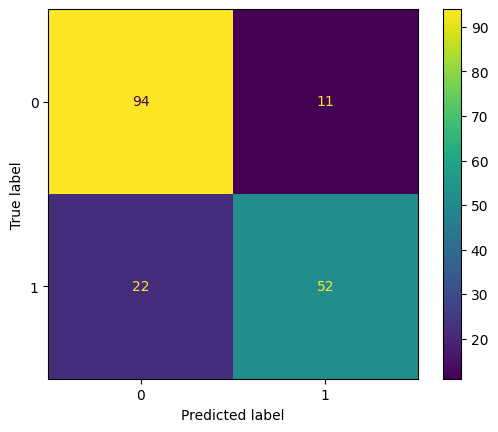

In [66]:
ConfusionMatrixDisplay.from_estimator(best_gbc, xtest, ytest)

In [67]:
ypred_train2 = best_gbc.predict(xtrain)
ypred_test2 = best_gbc.predict(xtest)

In [68]:
ypred_test2[0:5]

array([0, 0, 0, 1, 0])

In [69]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [70]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



### Gradient boosting model is slightly better in this case and accuracy is more that 80% in test 

### Choosing Gradient boosting model for final out of sample data predictions

### plot the feature importance

In [71]:
best_gbc.feature_importances_

array([0.13339619, 0.17633402, 0.04986728, 0.01389106, 0.23344895,
       0.12617056, 0.24480596, 0.00727101, 0.00112784, 0.01368715])

In [72]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [73]:
imp = pd.Series(best_gbc.feature_importances_, index=xtrain.columns)

In [74]:
imp

num__Pclass        0.133396
num__Age           0.176334
num__SibSp         0.049867
num__Parch         0.013891
num__Fare          0.233449
cat__Sex_female    0.126171
cat__Sex_male      0.244806
cat__Embarked_C    0.007271
cat__Embarked_Q    0.001128
cat__Embarked_S    0.013687
dtype: float64

In [76]:
imp.sort_values(ascending=False)

cat__Sex_male      0.244806
num__Fare          0.233449
num__Age           0.176334
num__Pclass        0.133396
cat__Sex_female    0.126171
num__SibSp         0.049867
num__Parch         0.013891
cat__Embarked_S    0.013687
cat__Embarked_C    0.007271
cat__Embarked_Q    0.001128
dtype: float64

<Axes: >

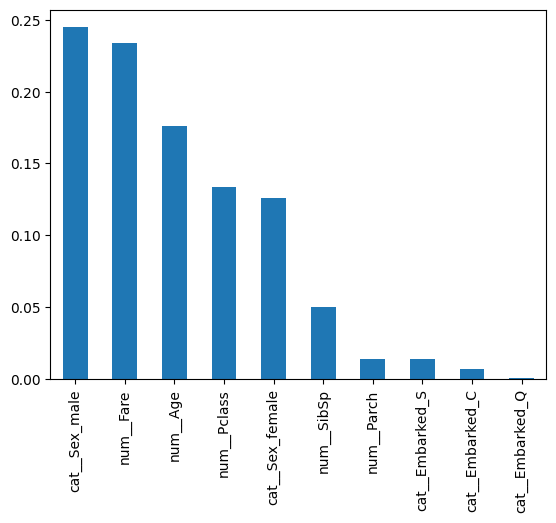

In [77]:
imp.sort_values(ascending=False).plot(kind='bar')

### Predict Out of sample data results

In [78]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [80]:
xnew_pre = pre.fit_transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.873482,0.386231,-0.499470,-0.400248,-0.497413,0.0,1.0,0.0,1.0,0.0
1,0.873482,1.371370,0.616992,-0.400248,-0.512278,1.0,0.0,0.0,0.0,1.0
2,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,0.0,1.0,0.0,1.0,0.0
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,0.0,1.0,0.0,0.0,1.0
4,0.873482,-0.598908,0.616992,0.619896,-0.417492,1.0,0.0,0.0,0.0,1.0


### Predict the survival with probability

In [81]:
preds = best_gbc.predict(xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 0])

In [82]:
best_gbc.classes_

array([0, 1])

In [83]:
probs = best_gbc.predict_proba(xnew_pre)
probs[0:5]

array([[0.97052529, 0.02947471],
       [0.9598396 , 0.0401604 ],
       [0.63142251, 0.36857749],
       [0.54316327, 0.45683673],
       [0.52315126, 0.47684874]])

In [84]:
prob_sur = probs[:,1]
prob_sur[0:5]

array([0.02947471, 0.0401604 , 0.36857749, 0.45683673, 0.47684874])

In [85]:
# Save above results in dataframe
df_final = xnew[['PassengerId']]
df_final.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [86]:
df_final['Survival_pred'] = preds
df_final['Probability'] = prob_sur

In [87]:
df_final

,PassengerId,Survival_pred,Probability
0,892,0,0.029475
1,893,0,0.040160
2,894,0,0.368577
3,895,0,0.456837
4,896,0,0.476849
...,...,...,...
413,1305,0,0.388899
414,1306,1,0.979510
415,1307,0,0.024573
416,1308,0,0.388899


In [88]:
df_final['Survival_pred'].value_counts()

Survival_pred
0    260
1    158
Name: count, dtype: int64

<Axes: xlabel='Survival_pred'>

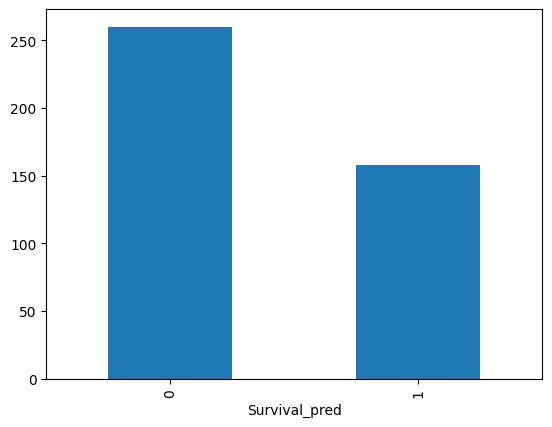

In [89]:
df_final['Survival_pred'].value_counts().plot(kind='bar')